# Exercise 3.7.2

Consider the points P(5,10) and Q(10,5) in R2.

Create 50 points equally divided into two clusters in R2, first one centered at P, and the second one centered at Q.
Make the distances of the points from the centers normally distributed with a mean 0 and standard deviation 2.

In [4]:
from math import sqrt
import random
import numpy as np
import matplotlib.pyplot as plt

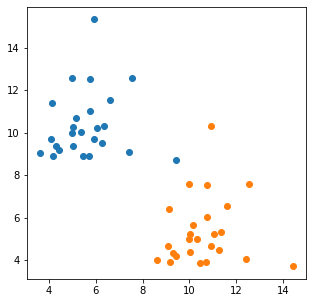

In [5]:
SAMPLES=25
STD_DEV = 2
MEAN = 0
P = (5,10)
Q = (10,5)

r=np.random.normal(MEAN,STD_DEV,SAMPLES)
th=2*np.pi*np.random.rand(1,SAMPLES)
p1=P[0]+r*np.cos(th)
p2=P[1]+r*np.sin(th)

# r=RADIUS*np.random.normal(0,1,SAMPLES)
# th=2*np.pi*np.random.rand(1,SAMPLES)
q1=Q[0]+r*np.cos(th)
q2=Q[1]+r*np.sin(th)


fig = plt.figure(figsize=(5,5))
ax = plt.scatter(p1,p2)
ax = plt.scatter(q1,q2)


 (b) Use the random.sample function to select 20 integers from the set of integers from 1
to 50. Use these numbers as indices to select 20 points from the total of 50 points. Plot these points
using red circular markers. Plot the rest of the points using blue square markers. 

In [6]:
s = list(zip(q1[0], q2[0]))
t=  list(zip(p1[0], p2[0]))
t.extend(s)
print(len(t))

50


In [7]:
N=20
low=1
high=50
X = random.sample(range(1,51),N)
Y = [ i for i in range(1,51) if i not in X]

In [8]:
red_circle_points = [t[i-1] for i in X]
blue_square_points = [t[i-1] for i in Y]

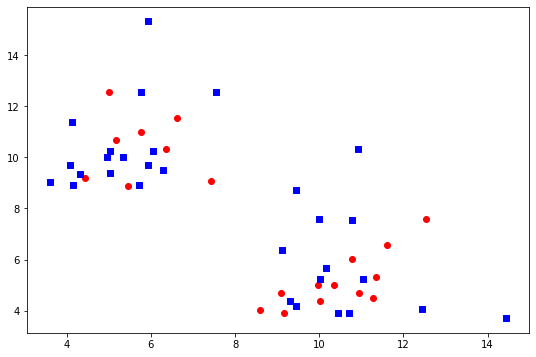

In [9]:
red= list(zip(*red_circle_points))
blue= list(zip(*blue_square_points))

fig, ax = plt.subplots(figsize=(9, 6))
path = ax.scatter(red[0], red[1], c='r',  marker='o')
path = ax.scatter(blue[0], blue[1], c='b', marker='s')


In [10]:
closer_to_p = []
for x,y in red_circle_points:
    p_dist = sqrt((P[0]-x)**2 + (P[1]-y)**2)
    q_dist = sqrt((Q[0]-x)**2 + (Q[1]-y)**2)
    if p_dist < q_dist:
        closer_to_p.append((p_dist,q_dist))



(d) Compute in your
program, out of the 20 points selected, how many are closer to point P than point Q

In [11]:
len(closer_to_p)

8

# Exercise 4.1.2

Exercise 4.1.2 Consider two cubic clusters of points in R3. The first one is uniformly distributed in
[14, 20] × [0, 6] × [0, 6] and the second in [0, 6] × [14, 20] × [14, 20]. Design a basic perceptron to
separate the two clusters of points.


(d) Simulate a total of 4000 points in the two clusters using Python.


In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [13]:
N = 2000
range_A = [(14,20), (0,6), (0,6)]
range_B = [(0,6), (14,20), (14,20)]

classes = []
for D,label in [(range_A,1),(range_B,0)]:
    train = np.empty((0,N))
    for r in D:
        minimum = r[0]
        maximum = r[1]
        possible_features = np.linspace(minimum, maximum, num=N)
        features = np.random.choice(possible_features,N)
        train = np.vstack((train,features))
    labels = np.full((1, N), label)
    train = np.vstack((train,labels))
    classes.append(train)
data_set = np.hstack(classes)

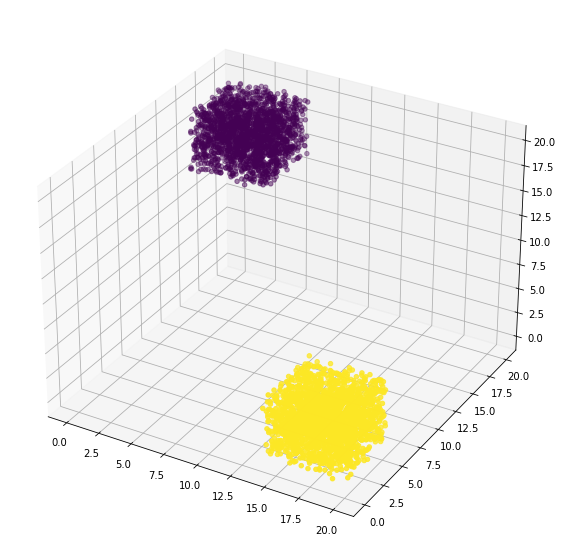

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
Path3 = ax.scatter(data_set[0], data_set[1], data_set[2], zdir='z', s=20, c=data_set[3], depthshade=True)


(e) Use M = 100 points to train the basic perceptron.


In [153]:
# Setting Training weights
M = 100
TEST_LEN = 3000

# Randomly sample 200 data points across 4000 points 
rand_indices_train = random.sample(range(0,2*N),M)
training = data_set[:,rand_indices_train]

# Ensure Training is Seperate from Testing
test_possible_index = [i for i in range(0,2*N) if i not in rand_indices_train]
# Get randomly sampled indexes for testing 
rand_indices_test = random.sample(test_possible_index,TEST_LEN)
testing = data_set[:,rand_indices_test]


In [155]:
training.shape

(4, 100)

Confirming there is no overlap between train and testing data

In [156]:
list1_as_set = set(rand_indices_test)
intersection = list1_as_set.intersection(rand_indices_train)
intersection


set()

13.192989995560584 -13.542740314974159 -11.738125946263818 0.4641662310102175


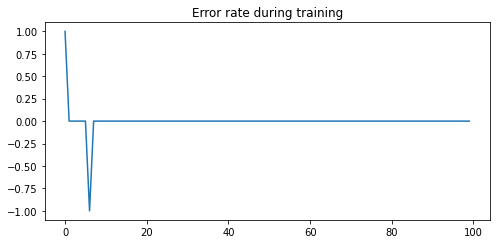

In [166]:
e = 0
w1 = 0.5-np.random.rand()
w2 = 0.5-np.random.rand()
w3 = 0.5-np.random.rand()
b = 0.5-np.random.rand()

error_log = []
# Training
for x1,x2,x3,truth in training.T:
    pred = w1*x1 + w2*x2 + w3*x3 + b
    if pred>0:
        pred=1
    else:
        pred=0
    
    e = truth-pred
    error_log.append(e)
    w1 += e*x1
    w2 += e*x2
    w3 += e*x3
    b += e

plt.plot(error_log)
plt.title("Error rate during training")
print(w1,w2,w3,b)

(f) Use another 1000 points to find the error rate.


In [167]:
e = 0
# Testing
for x1,x2,x3,truth in testing.T:
    pred = w1*x1 + w2*x2 + w3*x3 + b
    if pred>0:
        pred=1
    else:
        pred=0
    local_e = abs(truth-pred)
    if local_e==1:
        e+=1
print(f"error is {e/testing.shape[1]}")

error is 0.0


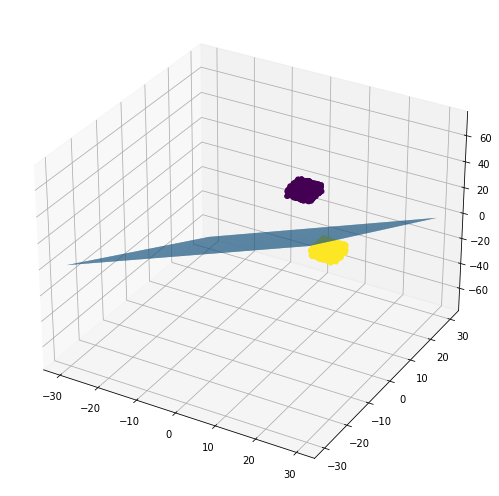

In [169]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-30, 30, 100)
y = np.linspace(-30, 30, 100)

x, y = np.meshgrid(x, y)
eq =  (-w1*x -w2*y - b)/w3

ax.plot_surface(x, y, eq)

Path3 = ax.scatter(testing[0], testing[1], testing[2], s=20, c=testing[3].astype(int), depthshade=False)
# ax.view_init(180, 180)
plt.show()

(g) If the error rate is smaller than 0.1 stop. Otherwise increase M, and repeat parts (e) and (f).

# Exercise 4.2.1

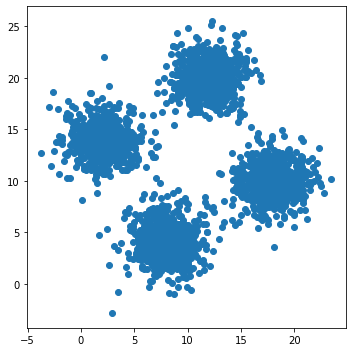

In [187]:
N= 1000

p = [2,14,12,20,8,4,18,10]

x = np.zeros((4*N, 2))
t = np.zeros((4*N, 2))

r = np.random.normal(0,2,4*N)
the = 2*np.pi*np.random.rand(4*N)
x[0:N, 0] = p[0] + r[0:N]*np.cos(the[0:N])
x[0:N, 1] = p[1] + r[0:N]*np.sin(the[0:N])
t[0:N,0] = 0
t[0:N,1] = 1

x[N:2*N, 0] = p[2] + r[N:2*N]*np.cos(the[N:2*N])
x[N:2*N, 1] = p[3] + r[N:2*N]*np.sin(the[N:2*N])
t[N:2*N,0] = 1
t[N:2*N,1] = 1

x[2*N:3*N, 0] = p[4] + r[2*N:3*N]*np.cos(the[2*N:3*N])
x[2*N:3*N, 1] = p[5] + r[2*N:3*N]*np.sin(the[2*N:3*N])
t[2*N:3*N,0] = 0
t[2*N:3*N,1] = 0


x[3*N:4*N, 0] = p[6] + r[3*N:4*N]*np.cos(the[3*N:4*N])
x[3*N:4*N, 1] = p[7] + r[3*N:4*N]*np.sin(the[3*N:4*N])
t[3*N:4*N,0] = 1
t[3*N:4*N,1] = 0

plt.figure(figsize = (5,5))
plt.scatter(x[:,0], x[:,1])



In [177]:
w11=np.random.rand()
w11 = 0.5 - w11

w12=np.random.rand()
w12 = 0.5 - w12

w21=np.random.rand()
w21 = 0.5 - w21

w22=np.random.rand()
w22 = 0.5 - w22

b1=np.random.rand()
b1 = 0.5 - b1

b2=np.random.rand()
b2 = 0.5 - b2

error rate: 0.0026666666666666666 

Line #1 parameter values
W11: 17.85544031100758  W12: 8.412637628144912  b1: -294.2324952431654

Line #2 parameter values
W21: -72.95504467721034  W22: 70.76230522748408  b1: -294.2324952431654


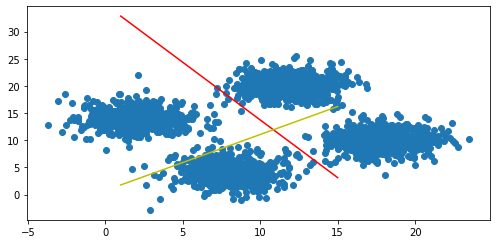

In [193]:

## TRAIN
a = range(0, 4*N)
sp = random.sample(a, 4000)
M= 1000

for i in range(0,M):
  y1 = b1 + w11*x[sp[i], 0] + w12*x[sp[i], 1]
  if y1<0:
    y1 = 0 
  else:
    y1 = 1

  e = t[sp[i], 0] - y1
  w11 = w11 + e*x[sp[i], 0]
  w12 = w12 + e*x[sp[i], 1]
  b1 = b1 + e

  y2 = b2 + w21*x[sp[i], 0] + w22*x[sp[i], 1]
  if y2<0:
    y2 = 0 
  else:
    y2 = 1

  e = t[sp[i], 1] - y2
  w21 = w21 + e*x[sp[i], 0]
  w22 = w22 + e*x[sp[i], 1]
  b2 = b2 + e
## TEST
er = 0 
for i in range (M, M+1000):
  y1 = b1 + w11*x[sp[i], 0] + w12*x[sp[i], 1]
  if y1<0:
    y1 = 0 
  else:
    y1 = 1

  e1 = abs(t[sp[i],0] -y1)

  y2 = b2 + w21*x[sp[i], 0] + w22*x[sp[i], 1]
  if y2<0:
    y2 = 0 
  else:
    y2 = 1

  e2 = abs(t[sp[i],1] -y2)

  if (e1 ==1 or e2 ==1):
    er = er + 1

er = er/3000
print(f"error rate: {er} \n")
ii = np.linspace(1,15,15)
plt.scatter(x[:,0], x[:,1])
plt.plot(ii, (-b1-w11*ii)/w12, c='r')
plt.plot(ii, (-b2-w21*ii)/w22, c='y')  
print('Line #1 parameter values')
print(f"W11: {w11}  W12: {w12}  b1: {b1}")
print('\nLine #2 parameter values')
print(f"W21: {w21}  W22: {w22}  b1: {b1}")
